In [1]:
#Importing the necessary libraries
import numpy as np 
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns
%matplotlib inline

In [2]:
#Importing and converting the csv file to a Pandas Dataframe for easy manipulation
df = pd.read_csv('loan_approval_dataset.csv')

In [3]:
#Checking the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [4]:
#Checking to see if there's any missing datapoint
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [5]:
#Displaying the first five datapoints
df.head()

loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   12400000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                  17600000              22700000            8000000   
1                   2200000               8800000            3300000   
2                   4500000              33300000           12800000   
3                   3300000              23300000            7900000   
4                   8200000              29400000            5000000   

   loan_status  
0     Approved  
1     Rejected  
2     Rejected  
3     Rejected  
4     Rejected

In [6]:
#There are whitespaces before the letters in the column names
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [7]:
#Removing the whitespaces from the column names and displaying them to make sure they've change accordingly 
for i in df.columns:
    df.rename(columns={i : i.strip()}, inplace=True)
    
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [8]:
#Checking the summarized description of the numerical columns
df.describe()

loan_id  no_of_dependents  income_annum   loan_amount    loan_term  \
count  4269.000000       4269.000000  4.269000e+03  4.269000e+03  4269.000000   
mean   2135.000000          2.498712  5.059124e+06  1.513345e+07    10.900445   
std    1232.498479          1.695910  2.806840e+06  9.043363e+06     5.709187   
min       1.000000          0.000000  2.000000e+05  3.000000e+05     2.000000   
25%    1068.000000          1.000000  2.700000e+06  7.700000e+06     6.000000   
50%    2135.000000          3.000000  5.100000e+06  1.450000e+07    10.000000   
75%    3202.000000          4.000000  7.500000e+06  2.150000e+07    16.000000   
max    4269.000000          5.000000  9.900000e+06  3.950000e+07    20.000000   

       cibil_score  residential_assets_value  commercial_assets_value  \
count  4269.000000              4.269000e+03             4.269000e+03   
mean    599.936051              7.472617e+06             4.973155e+06   
std     172.430401              6.503637e+06             4.388966e+06   
min     300.000000             -1.000000e+05             0.000000e+00   
25%     453.000000              2.200000e+06             1.300000e+06   
50%     600.000000              5.600000e+06             3.700000e+06   
75%     748.000000              1.130000e+07             7.600000e+06   
max     900.000000              2.910000e+07             1.940000e+07   

       luxury_assets_value  bank_asset_value  
count         4.269000e+03      4.269000e+03  
mean          1.512631e+07      4.976692e+06  
std           9.103754e+06      3.250185e+06  
min           3.000000e+05      0.000000e+00  
25%           7.500000e+06      2.300000e+06  
50%           1.460000e+07      4.600000e+06  
75%           2.170000e+07      7.100000e+06  
max           3.920000e+07      1.470000e+07

## Exploratory Data Analysis

<Axes: xlabel='loan_status', ylabel='count'>

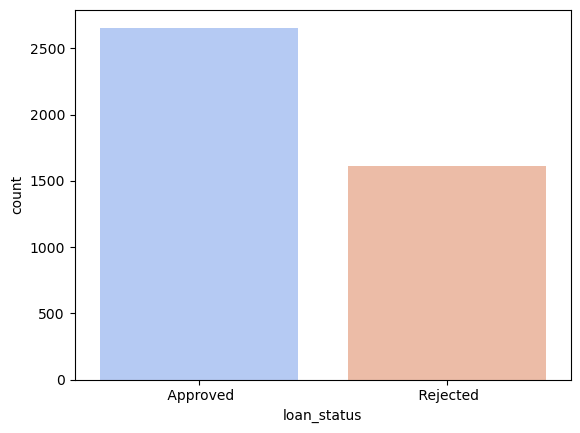

In [12]:
sns.countplot(x=df['loan_status'],palette= 'coolwarm')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


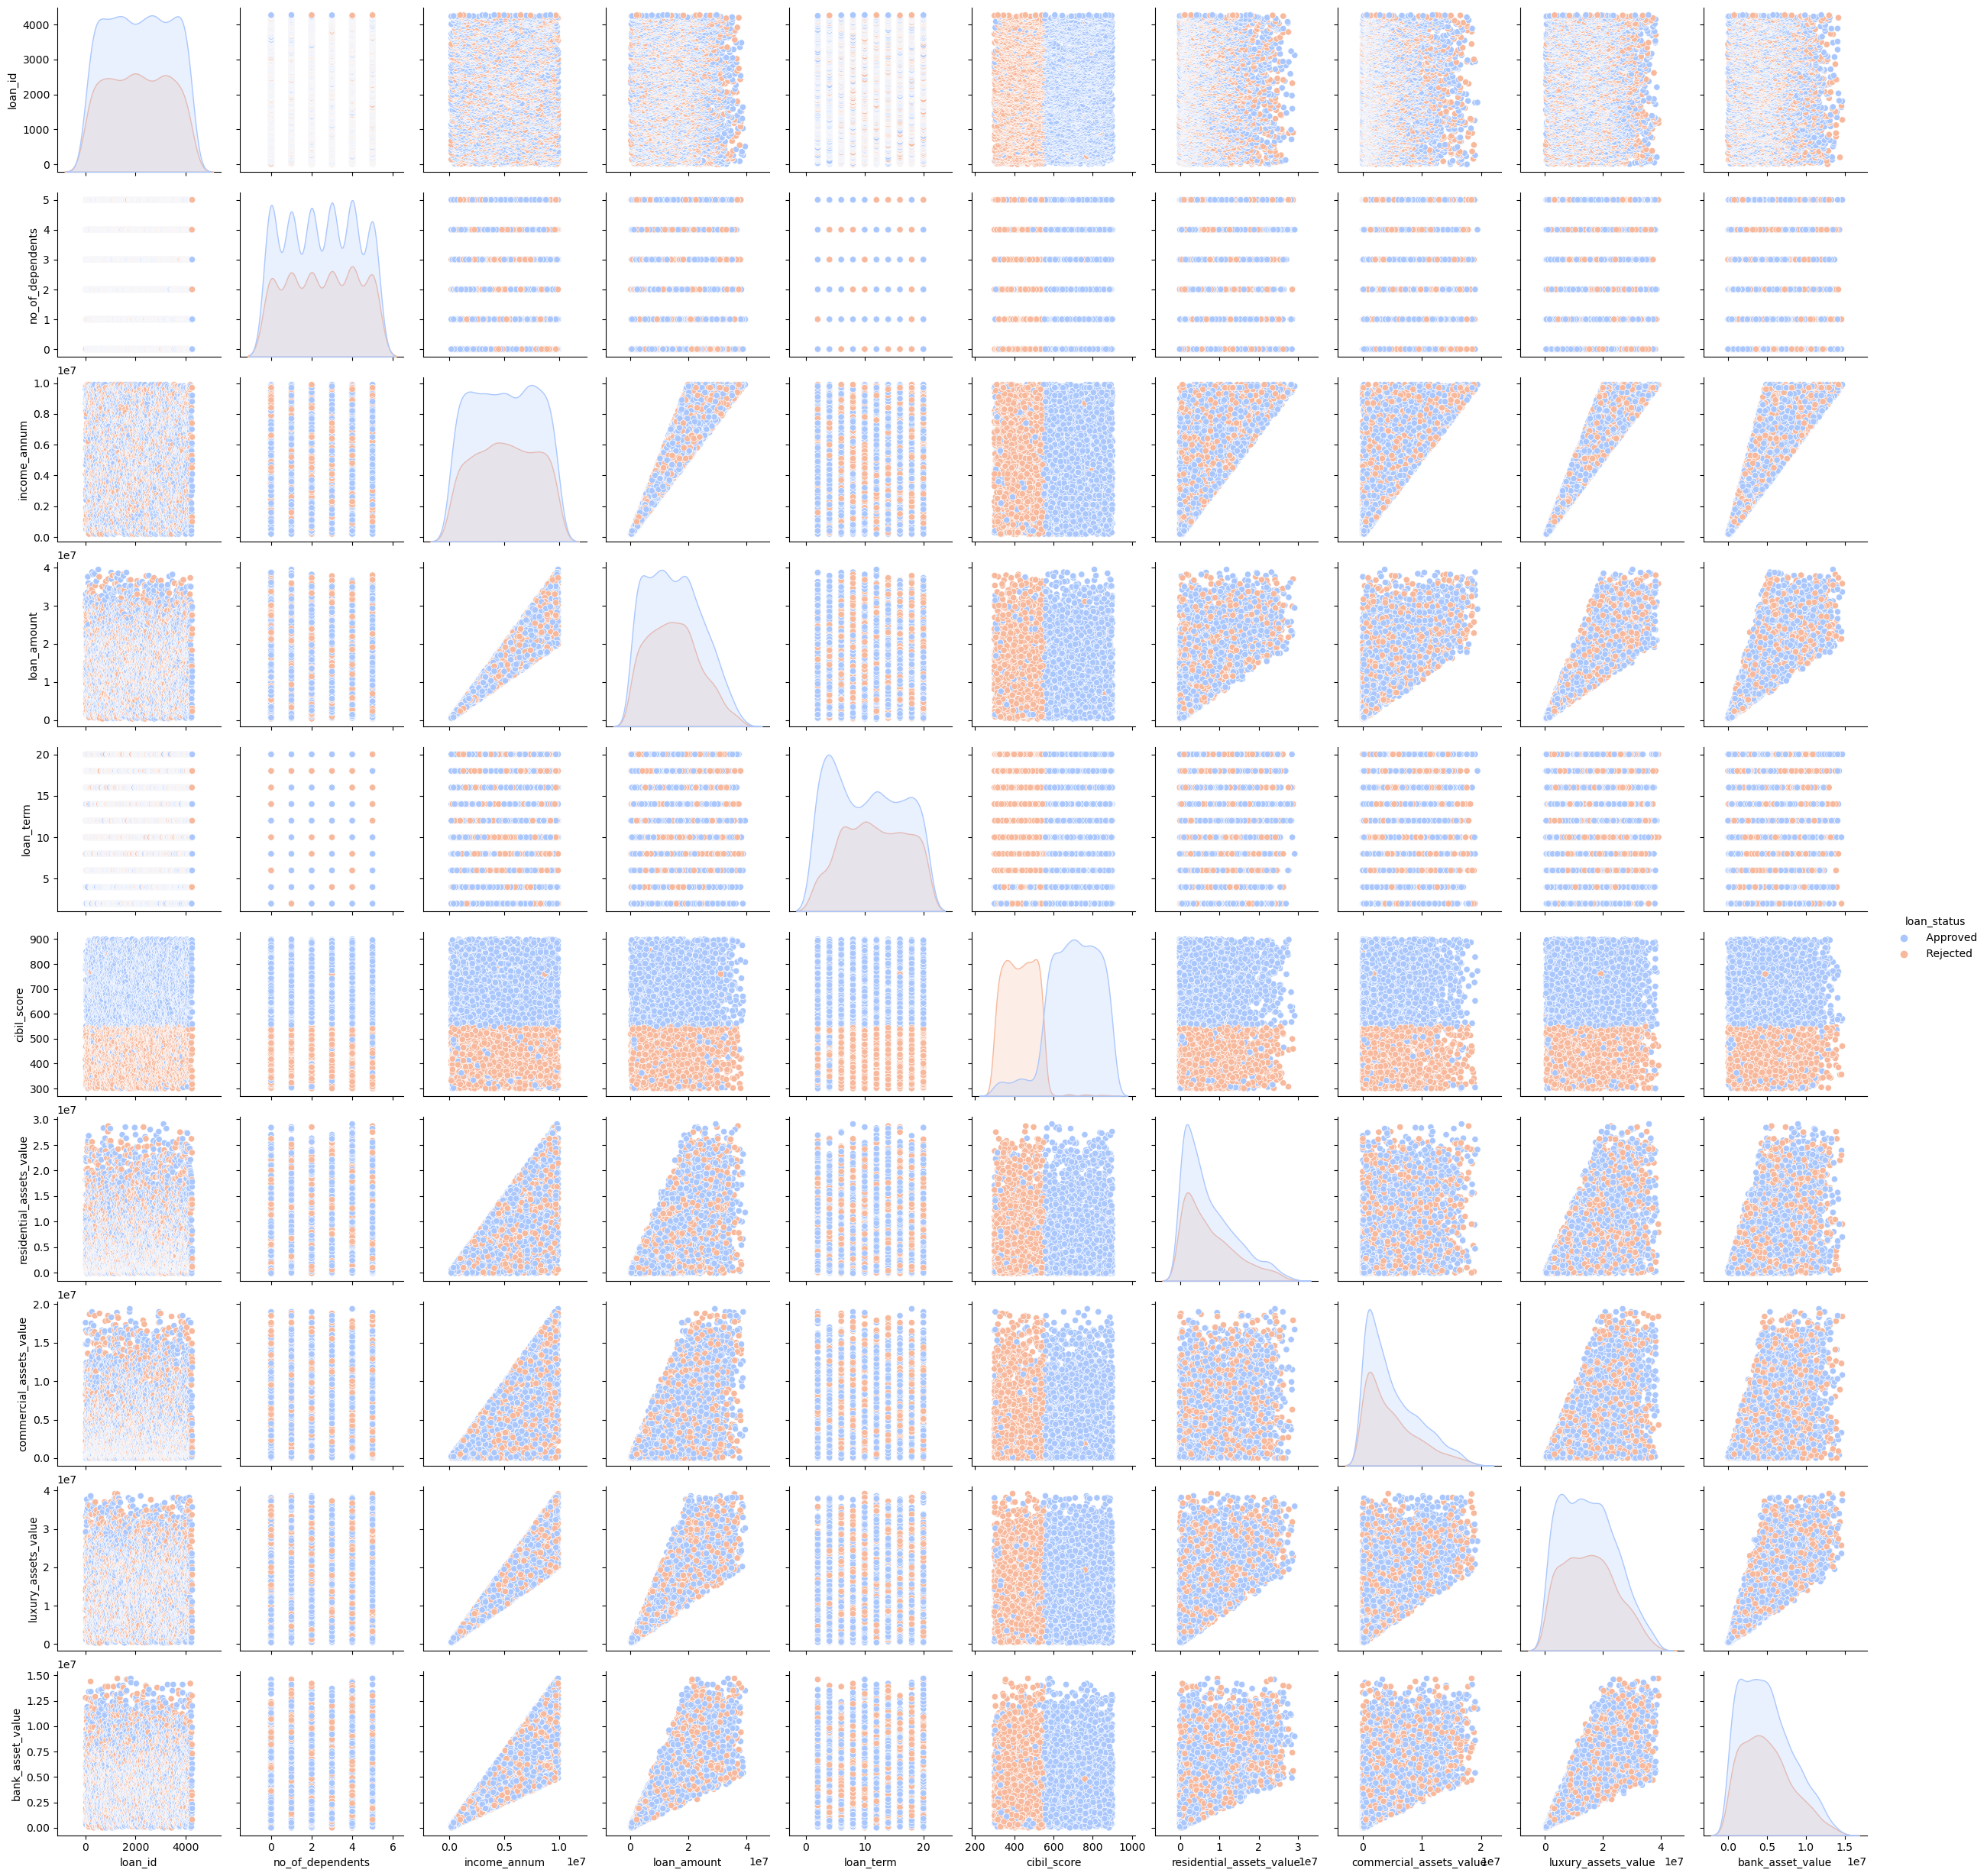

In [111]:
#Visualizing the dataset with seaborn pairplot
sns.pairplot(df, hue='loan_status', palette= 'coolwarm')

In [112]:
'''Creating another column namee 'repayable', this is the sum of the value of the clients assets
    and the the loan they are requesting is deducted from
    it to know if the client assetss can pay for the loan if the they default'''

df['repayable']= (df['residential_assets_value']+df['commercial_assets_value']+df['luxury_assets_value']+df['bank_asset_value'])-df['loan_amount']
df['repayable']

0       20800000
1        4800000
2       28000000
3       22000000
4       30800000
          ...   
4264     5100000
4265     8700000
4266    15100000
4267    16000000
4268    47600000
Name: repayable, Length: 4269, dtype: int64

In [113]:
# Displaying the 'repayable' description
df['repayable'].describe()

count    4.269000e+03
mean     1.741532e+07
std      1.250514e+07
min     -5.500000e+06
25%      7.200000e+06
50%      1.530000e+07
75%      2.540000e+07
max      6.540000e+07
Name: repayable, dtype: float64

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


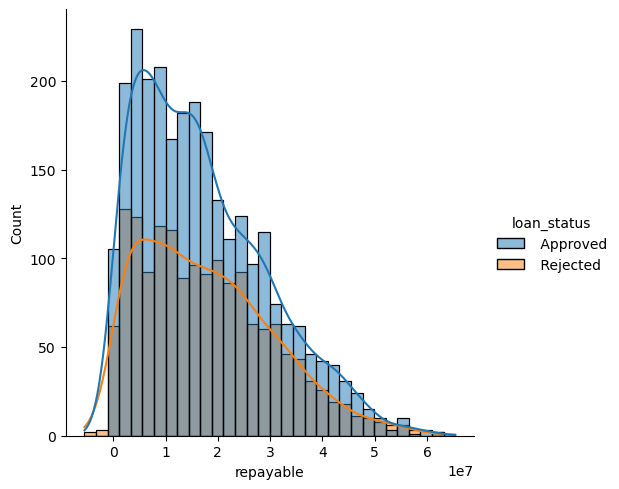

In [114]:
# Distribution plot of 'repayable' with loan status
sns.displot(df, x=df['repayable'],hue=df['loan_status'], kde=True)

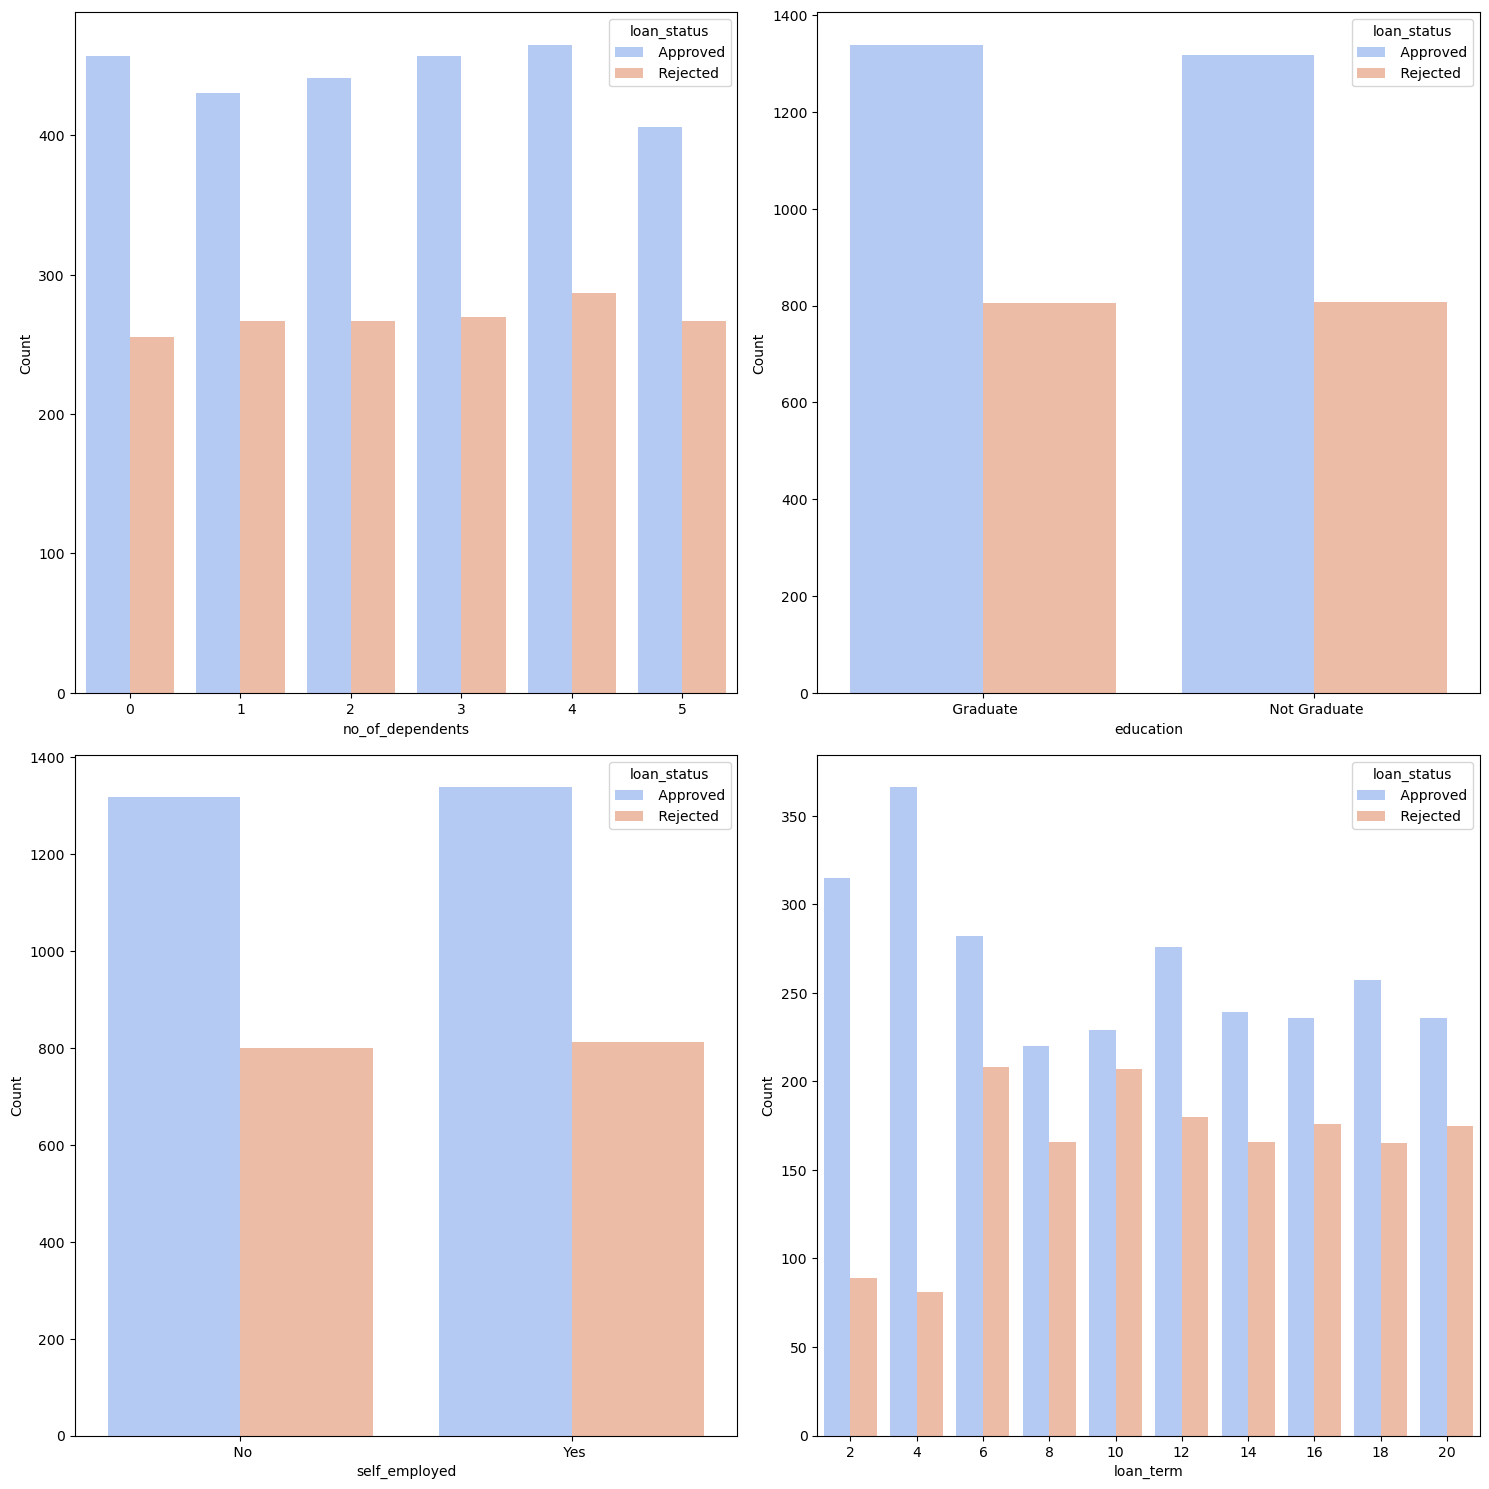

In [20]:
# Count plots for for the categorical columns
# Function to create a rounded rectangle patch

fig = plt.figure(figsize=(15, 15))
# Iterate through each subplot
for e, i in enumerate(['no_of_dependents', 'education', 'self_employed', 'loan_term']):
    ax = plt.subplot(2, 2, e + 1)
    sns.countplot(x=df[i], hue=df['loan_status'], palette='coolwarm', ax=ax)

    plt.xlabel(i)
    plt.ylabel('Count')

# Display the plot
plt.tight_layout()

In [14]:
# Loan term count
loan_term_count=df[['loan_term','loan_status']]
loan_term_count=pd.DataFrame(loan_term_count.value_counts()).sort_values(by='loan_term')
loan_term_count

count
loan_term loan_status       
2          Approved      315
           Rejected       89
4          Approved      366
           Rejected       81
6          Approved      282
           Rejected      208
8          Rejected      166
           Approved      220
10         Approved      229
           Rejected      207
12         Rejected      180
           Approved      276
14         Approved      239
           Rejected      166
16         Approved      236
           Rejected      176
18         Approved      257
           Rejected      165
20         Approved      236
           Rejected      175

C:\Users\USER\AppData\Local\Temp\ipykernel_9760\2117575245.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


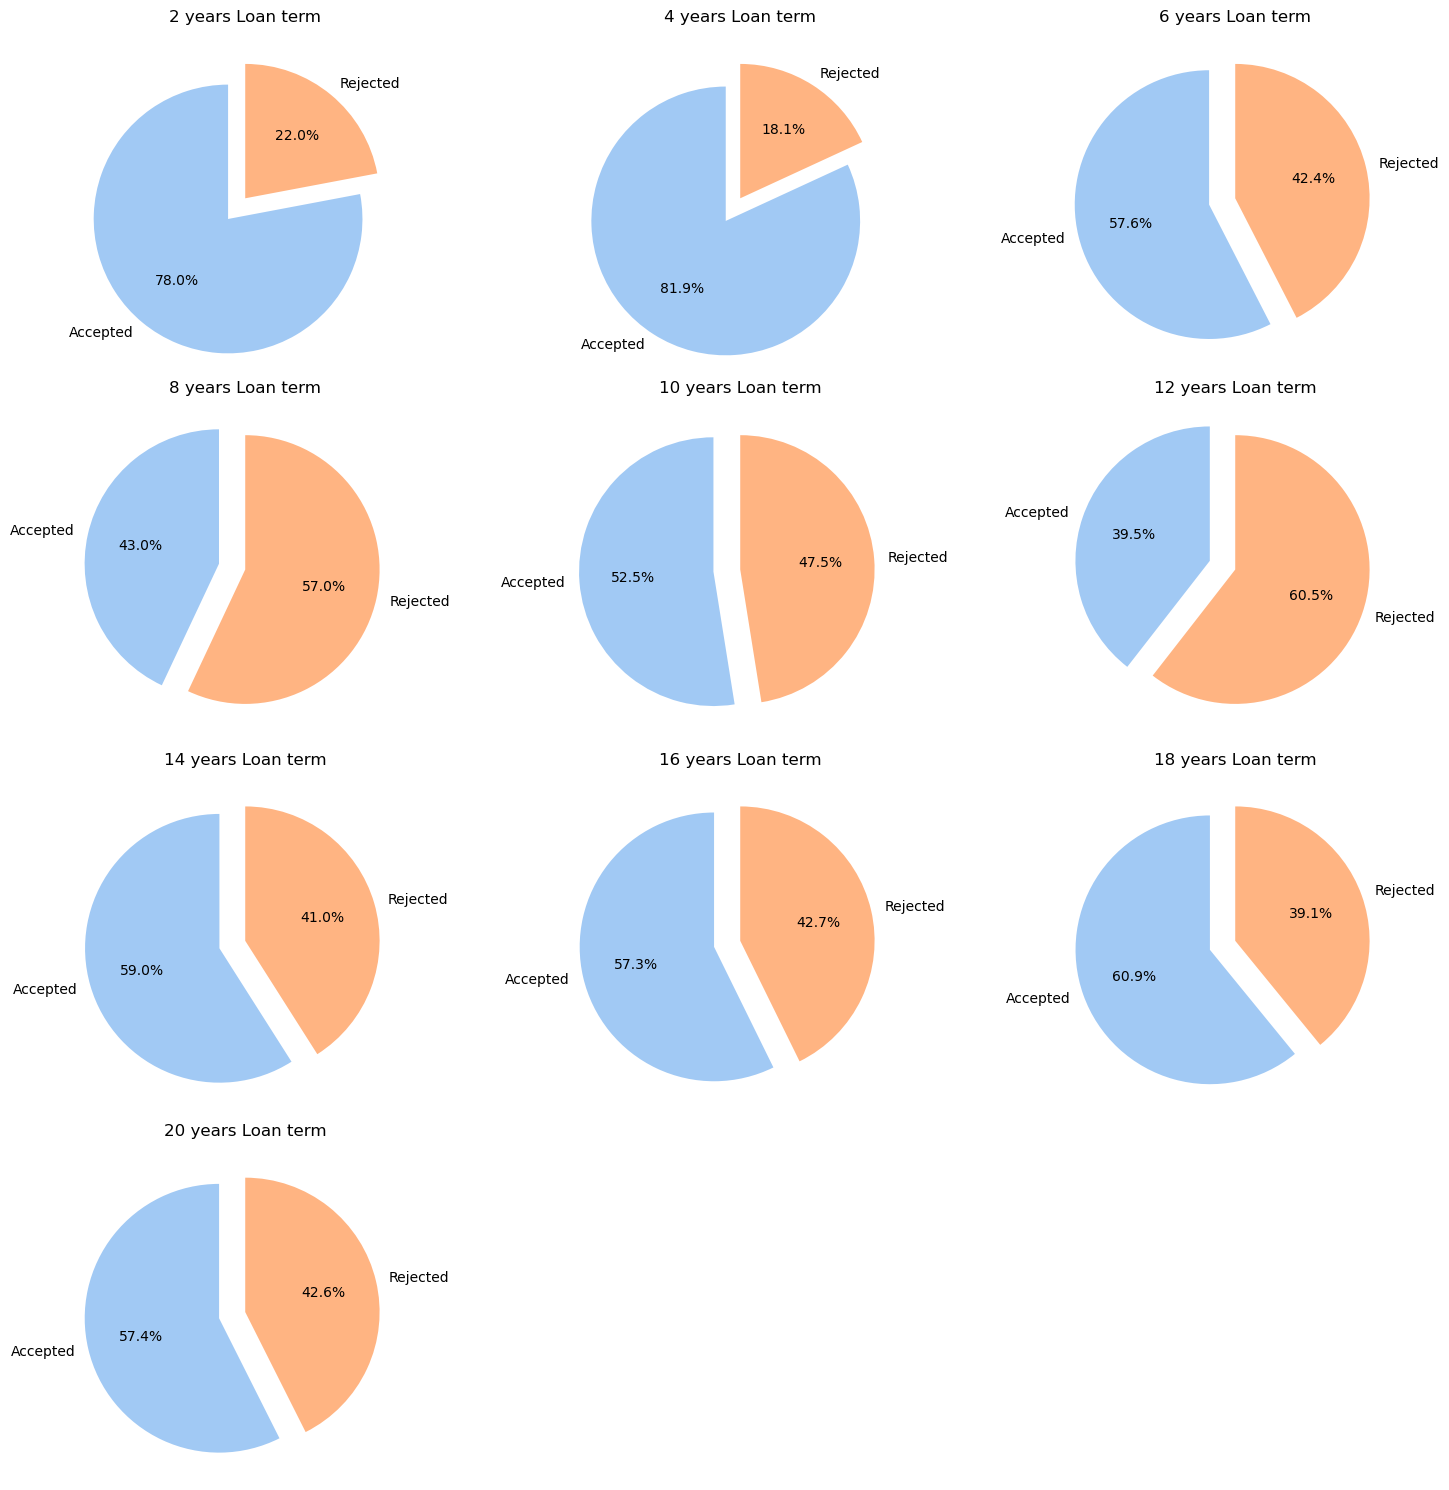

In [17]:
# Plot pie charts for loan terms
plt.figure(figsize=(15,15), constrained_layout=True)
colors=sns.color_palette('pastel')
for i,e in zip(range(1,11), range(2,21,2)):
    plt.subplot(4,3,i)
    plt.pie(loan_term_count.loc[e]['count'].values, explode=(0.2,0), 
            labels=['Accepted', 'Rejected'], autopct='%1.1f%%', colors=colors, startangle=90)
    plt.title(f'{e} years Loan term')
    plt.tight_layout()

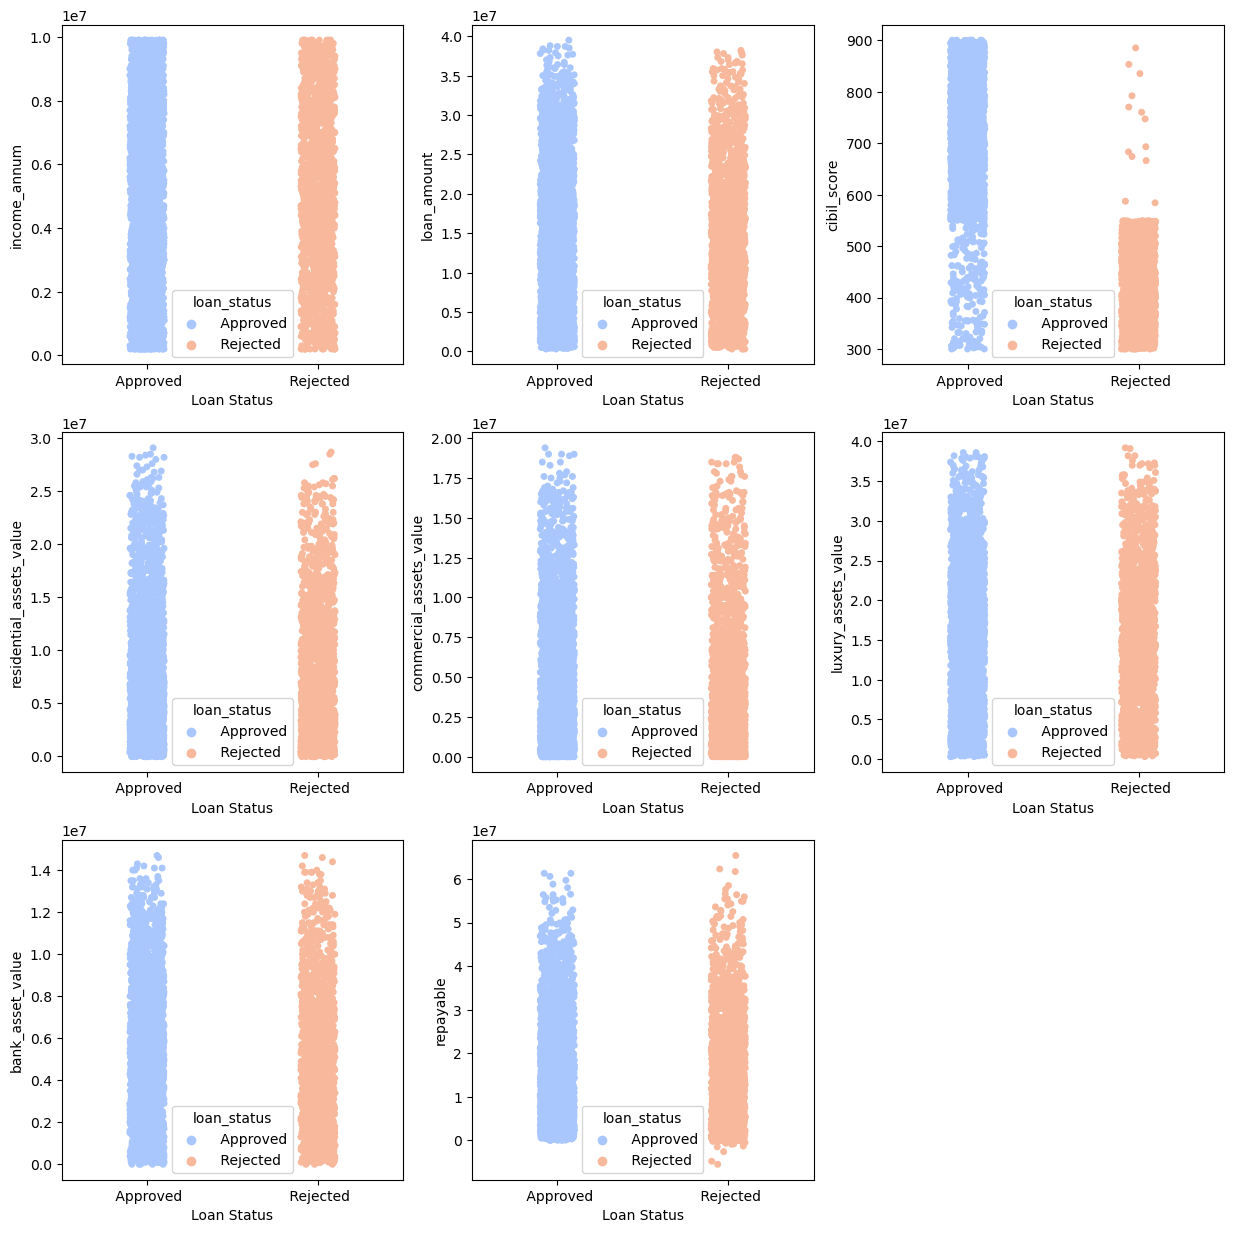

In [16]:
# Strip plots for various continous columns against loan status
fig = plt.figure(figsize=(15,15))
for e, i in enumerate(['income_annum', 'loan_amount', 'cibil_score',
                 'residential_assets_value', 'commercial_assets_value',
                 'luxury_assets_value', 'bank_asset_value', 'repayable']):
    plt.subplot(3,3,e+1)
    sns.stripplot(data=df, x= 'loan_status' , y= i, hue='loan_status', palette='coolwarm')
    plt.xlabel('Loan Status')
    plt.ylabel(i)

In [17]:
# Filtering the DataFrame for rows with cibil_score <= 550
# Selecting only the 'cibil_score' and 'loan_status' columns
# Counting the occurrences of each loan status in the filtered DataFrame
low_cibil= df[df['cibil_score']<=550]
low_cibil= low_cibil[['cibil_score','loan_status']]
low_cibil['loan_status'].value_counts()

loan_status
 Rejected    1600
 Approved     189
Name: count, dtype: int64

In [18]:
# Filtering the DataFrame for rows with cibil_score >= 550
# Selecting only the 'cibil_score' and 'loan_status' columns
# Counting the occurrences of each loan status in the filtered DataFrame
high_cibil= df[df['cibil_score']>=550]
high_cibil= high_cibil[['cibil_score','loan_status']]
high_cibil['loan_status'].value_counts()

loan_status
 Approved    2471
 Rejected      13
Name: count, dtype: int64

'From the pie chart below, we can deduce that clients with a Credit Score above 550 are usually accepted for the loan\n    While clients with a credidt score below 550 are usually denied a loan'

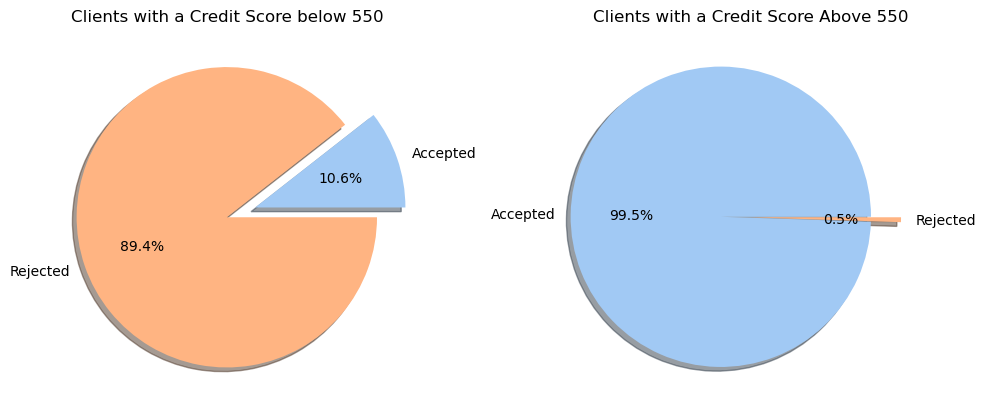

In [19]:
# Pie chart for clients with a credit score below 550

plt.figure(figsize=(10,5))
colors=sns.color_palette('pastel')

# First pie chart: Clients with a Credit Score below 550
plt.subplot(1,2,1)
plt.pie([189,1600], explode=(0.2,0), labels=['Accepted','Rejected'], autopct='%1.1f%%',shadow=True, colors=colors)
plt.title('Clients with a Credit Score below 550')

# Second pie chart: Clients with a Credit Score above 550
plt.subplot(1,2,2)
plt.pie([2471,13], explode=(0.2,0), labels=[ 'Accepted','Rejected'], autopct='%1.1f%%',shadow=True, colors=colors)
plt.title('Clients with a Credit Score Above 550')

plt.tight_layout()


'''From the pie chart below, we can deduce that clients with a Credit Score above 550 are usually accepted for the loan
    While clients with a credidt score below 550 are usually denied a loan'''

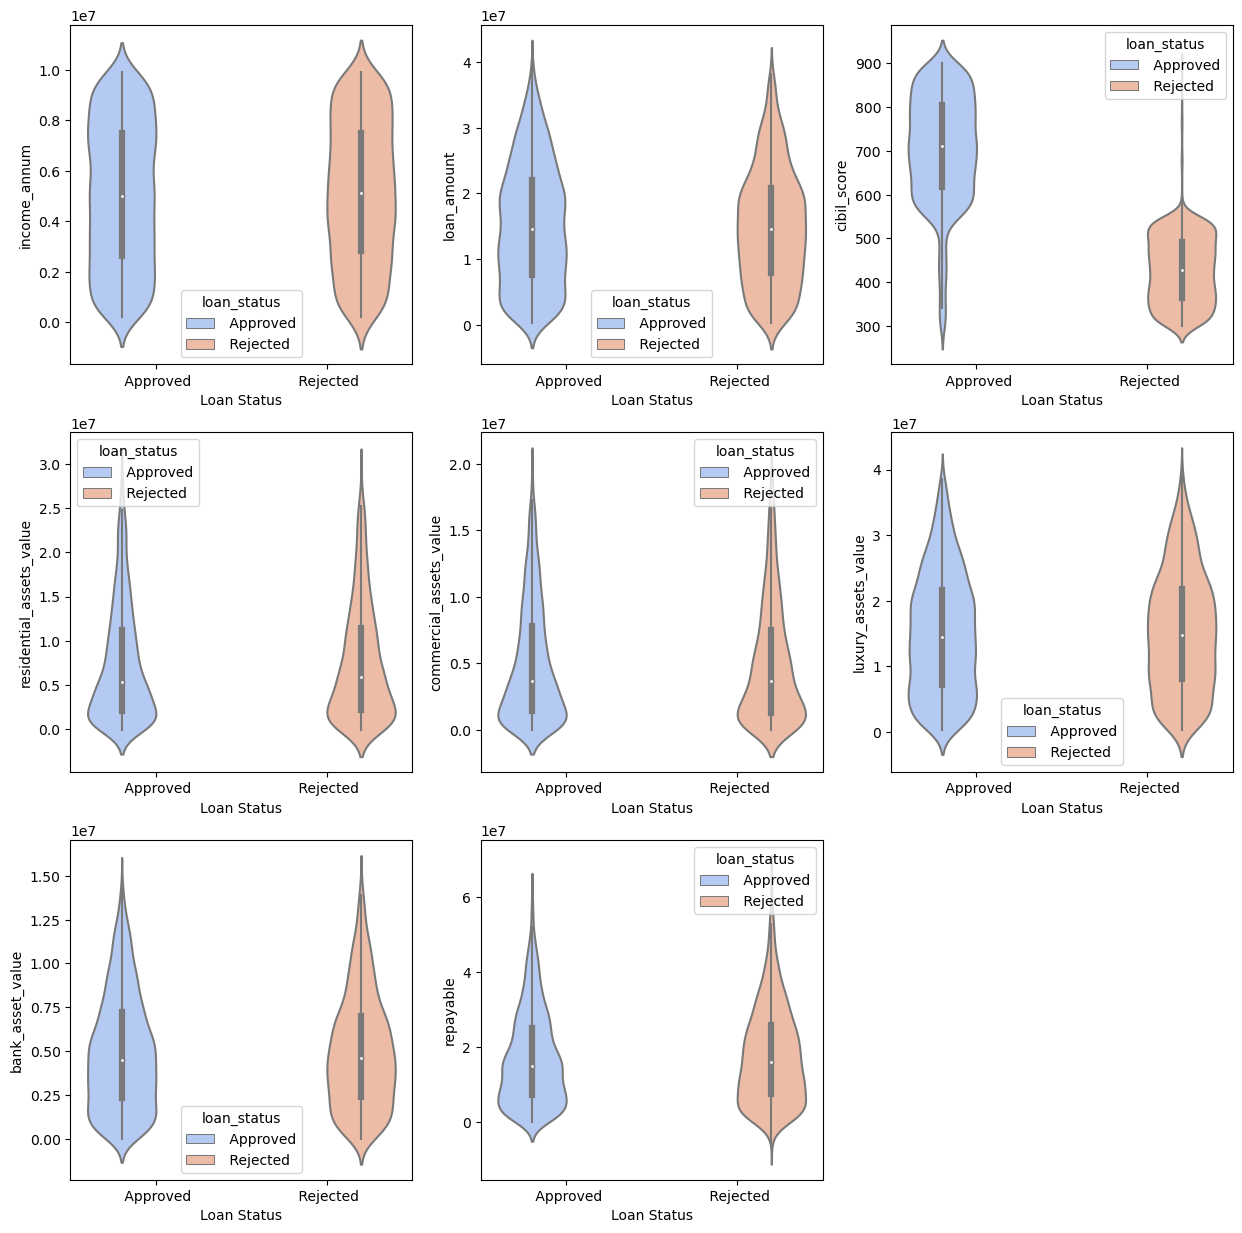

In [20]:
# Creating violin plots for each of the continous column against loan status
plt.figure(figsize=(15,15))
for e, i in enumerate(['income_annum', 'loan_amount', 'cibil_score',
                 'residential_assets_value', 'commercial_assets_value',
                 'luxury_assets_value', 'bank_asset_value', 'repayable']):
    plt.subplot(3,3,e+1)
    sns.violinplot(data=df, x= 'loan_status' , y= i, hue='loan_status', palette='coolwarm')
    plt.xlabel('Loan Status')
    plt.ylabel(i)

### Feature Engineering

In [21]:
# Mapping the categorical values of the 'education' and 'self_employed' column to numerical values
x={' Approved': 1, ' Rejected': 0}
y={' Graduate': 1, ' Not Graduate': 0}
z={' No': 0, ' Yes': 1}
df['loan_status']= df['loan_status'].map(x)
df['education']= df['education'].map(y)
df['self_employed']= df['self_employed'].map(z)
df

loan_id  no_of_dependents  education  self_employed  income_annum  \
0           1                 2          1              0       9600000   
1           2                 0          0              1       4100000   
2           3                 3          1              0       9100000   
3           4                 3          1              0       8200000   
4           5                 5          0              1       9800000   
...       ...               ...        ...            ...           ...   
4264     4265                 5          1              1       1000000   
4265     4266                 0          0              1       3300000   
4266     4267                 2          0              0       6500000   
4267     4268                 1          0              0       4100000   
4268     4269                 1          1              0       9200000   

      loan_amount  loan_term  cibil_score  residential_assets_value  \
0        29900000         12          778                   2400000   
1        12200000          8          417                   2700000   
2        29700000         20          506                   7100000   
3        30700000          8          467                  18200000   
4        24200000         20          382                  12400000   
...           ...        ...          ...                       ...   
4264      2300000         12          317                   2800000   
4265     11300000         20          559                   4200000   
4266     23900000         18          457                   1200000   
4267     12800000          8          780                   8200000   
4268     29700000         10          607                  17800000   

      commercial_assets_value  luxury_assets_value  bank_asset_value  \
0                    17600000             22700000           8000000   
1                     2200000              8800000           3300000   
2                     4500000             33300000          12800000   
3                     3300000             23300000           7900000   
4                     8200000             29400000           5000000   
...                       ...                  ...               ...   
4264                   500000              3300000            800000   
4265                  2900000             11000000           1900000   
4266                 12400000             18100000           7300000   
4267                   700000             14100000           5800000   
4268                 11800000             35700000          12000000   

      loan_status  repayable  
0               1   20800000  
1               0    4800000  
2               0   28000000  
3               0   22000000  
4               0   30800000  
...           ...        ...  
4264            0    5100000  
4265            1    8700000  
4266            0   15100000  
4267            1   16000000  
4268            1   47600000  

[4269 rows x 14 columns]

In [22]:
#Calculates the debt-to-income ratio by dividing the loan amount by the annual income for each row in the DataFrame.
#And Dropping the 'loan_id' column because it's unnecessary
df['debt_income_ratio'] = df['loan_amount']/df['income_annum']
df.drop('loan_id', axis=1, inplace=True)
df

no_of_dependents  education  self_employed  income_annum  loan_amount  \
0                    2          1              0       9600000     29900000   
1                    0          0              1       4100000     12200000   
2                    3          1              0       9100000     29700000   
3                    3          1              0       8200000     30700000   
4                    5          0              1       9800000     24200000   
...                ...        ...            ...           ...          ...   
4264                 5          1              1       1000000      2300000   
4265                 0          0              1       3300000     11300000   
4266                 2          0              0       6500000     23900000   
4267                 1          0              0       4100000     12800000   
4268                 1          1              0       9200000     29700000   

      loan_term  cibil_score  residential_assets_value  \
0            12          778                   2400000   
1             8          417                   2700000   
2            20          506                   7100000   
3             8          467                  18200000   
4            20          382                  12400000   
...         ...          ...                       ...   
4264         12          317                   2800000   
4265         20          559                   4200000   
4266         18          457                   1200000   
4267          8          780                   8200000   
4268         10          607                  17800000   

      commercial_assets_value  luxury_assets_value  bank_asset_value  \
0                    17600000             22700000           8000000   
1                     2200000              8800000           3300000   
2                     4500000             33300000          12800000   
3                     3300000             23300000           7900000   
4                     8200000             29400000           5000000   
...                       ...                  ...               ...   
4264                   500000              3300000            800000   
4265                  2900000             11000000           1900000   
4266                 12400000             18100000           7300000   
4267                   700000             14100000           5800000   
4268                 11800000             35700000          12000000   

      loan_status  repayable  debt_income_ratio  
0               1   20800000           3.114583  
1               0    4800000           2.975610  
2               0   28000000           3.263736  
3               0   22000000           3.743902  
4               0   30800000           2.469388  
...           ...        ...                ...  
4264            0    5100000           2.300000  
4265            1    8700000           3.424242  
4266            0   15100000           3.676923  
4267            1   16000000           3.121951  
4268            1   47600000           3.228261  

[4269 rows x 14 columns]

<Axes: >

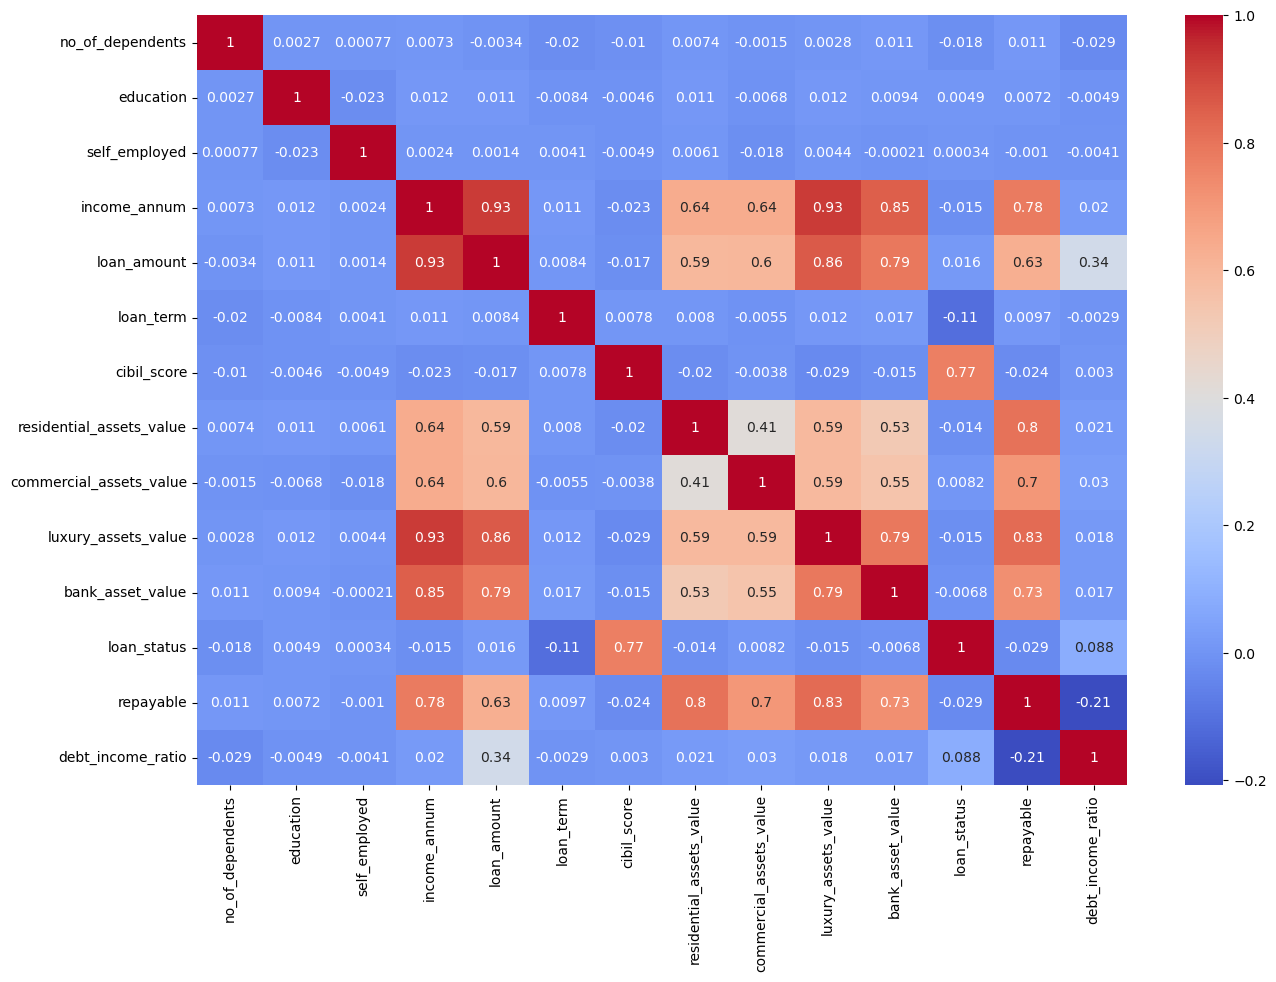

In [23]:
'''Plot the heatmap of correlation matrix
    Calculating the correlation matrix using df.corr()
    and annotating each cell with the correlation value'''

plt.figure(figsize= (15,10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

In [24]:
# Calculate the correlation of each feature with 'loan_status' and sort them in descending order
# Drop 'loan_status' from the resulting Series
df_loan_corr=pd.DataFrame( df.corr()['loan_status'].sort_values(ascending= False).drop('loan_status'))
df_loan_corr

loan_status
cibil_score                  0.770518
debt_income_ratio            0.087726
loan_amount                  0.016150
commercial_assets_value      0.008246
education                    0.004918
self_employed                0.000345
bank_asset_value            -0.006778
residential_assets_value    -0.014367
income_annum                -0.015189
luxury_assets_value         -0.015465
no_of_dependents            -0.018114
repayable                   -0.029277
loan_term                   -0.113036

<Axes: xlabel='loan_status'>

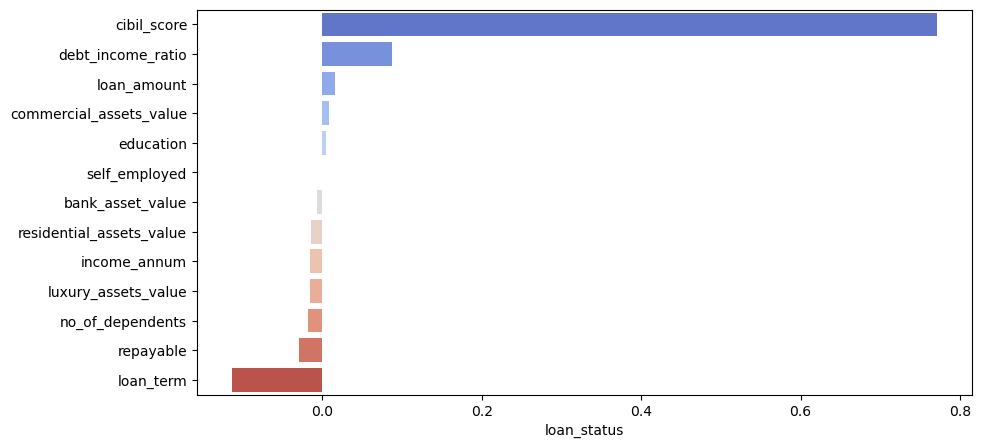

In [25]:
#Creating a horizontal bar plot to visualize the correlation between all the features to the loan_status feature(Target)
plt.figure(figsize= (10,5))
sns.barplot(df_loan_corr, x= df_loan_corr['loan_status'], y=df_loan_corr.index, palette='coolwarm')

## Data Preprocessing



In [26]:

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
X = df.drop('loan_status', axis=1)
y = df['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
len(X_test)

1281

In [28]:
#Importing the models 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [89]:
# Creating all the models objects
# To be used by Grid Search to find the most 

# Linear Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)

# Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
decision_tree_pred = decision_tree.predict(X_test)

# K Nearest Neighbor
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

# Support Vector Machine
svc = SVC()
svc.fit(X_train, y_train)
svc_pred=svc.predict(X_test)

# Random Forest Classifier
rfc= RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

In [30]:
predictions =  [log_reg_pred, decision_tree_pred, rfc_pred,knn_pred, svc_pred]

In [32]:
'''
Importing metrics from sklearn to evaluate the predictions
- Created a for loop to iterate throught the predictions of each model and 
then calculating its accuracy and classification report
'''
from sklearn.metrics import classification_report, confusion_matrix
Accuracy = {'Logistic Regression': 0, 'Decision Tree Classifier': 0,
            'Random Forest Classifier': 0,
          'K Nearest Neighbor': 0, 'Support Vector Machine': 0}
models = ['Logistic Regression', 'Decision Tree Classifier','Random Forest Classifier',
          'K Nearest Neighbor', 'Support Vector Machine']
for acc, model, prediction in zip(list(Accuracy.keys()), models, predictions):
    Accuracy[acc] = np.mean(y_test == prediction)
    print(f'{model} - Accuracy: {Accuracy[acc]} \n')
    print(classification_report(y_test, prediction),confusion_matrix(y_test, prediction), sep='\n')
    print('\n'*3)

Logistic Regression - Accuracy: 0.9156908665105387 

              precision    recall  f1-score   support

           0       0.88      0.91      0.89       493
           1       0.94      0.92      0.93       788

    accuracy                           0.92      1281
   macro avg       0.91      0.91      0.91      1281
weighted avg       0.92      0.92      0.92      1281

[[448  45]
 [ 63 725]]




Decision Tree Classifier - Accuracy: 0.9992193598750976 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       493
           1       1.00      1.00      1.00       788

    accuracy                           1.00      1281
   macro avg       1.00      1.00      1.00      1281
weighted avg       1.00      1.00      1.00      1281

[[492   1]
 [  0 788]]




Random Forest Classifier - Accuracy: 0.9984387197501952 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       493
           1  

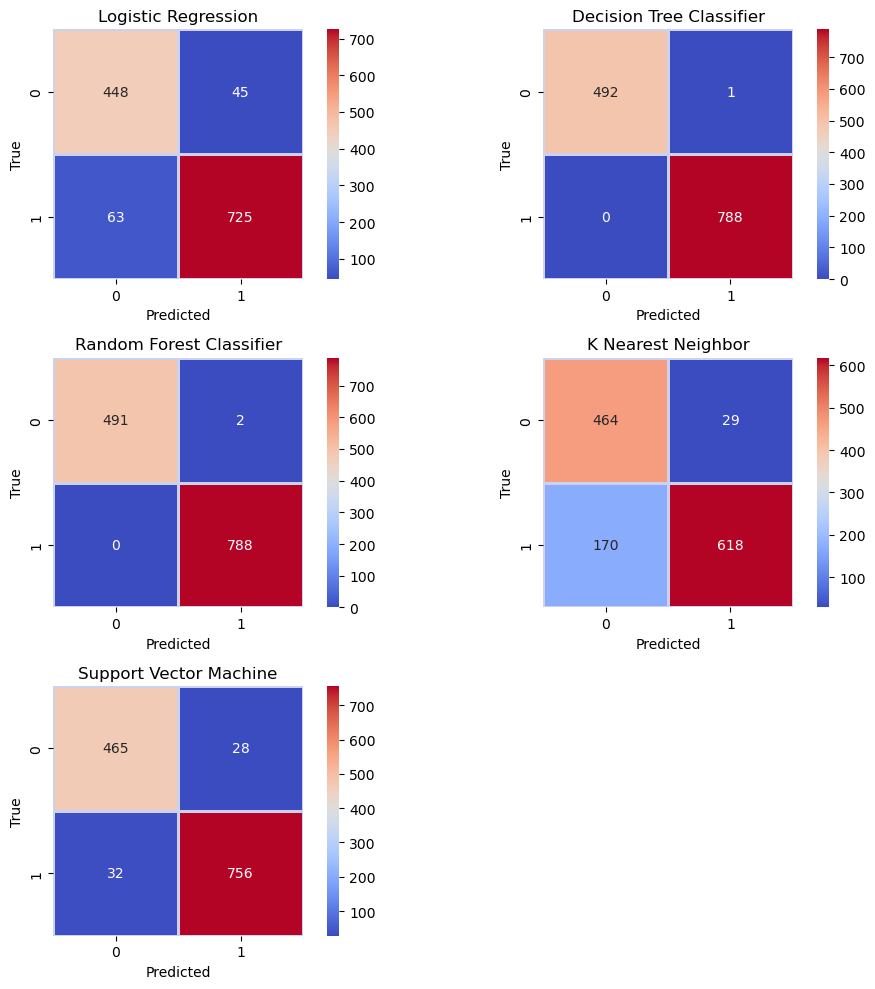

In [33]:
#Displaying the confusion matrix of all the models as a heatmap
fig = plt.figure(figsize=(10,10))
for prediction, e, model in zip(predictions,[1,2,3,4,5], models):
    plt.subplot(3,2,e)
    sns.heatmap(confusion_matrix(y_test, prediction), annot= True, cmap='coolwarm',
                fmt='.0f', square=True, linewidths=2, linecolor="#CCD1ED")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(model)
plt.tight_layout()
    

Models  Accuracy
1  Decision Tree Classifier  0.999219
2  Random Forest Classifier  0.998439
4    Support Vector Machine  0.953162
0       Logistic Regression  0.915691
3        K Nearest Neighbor  0.844653

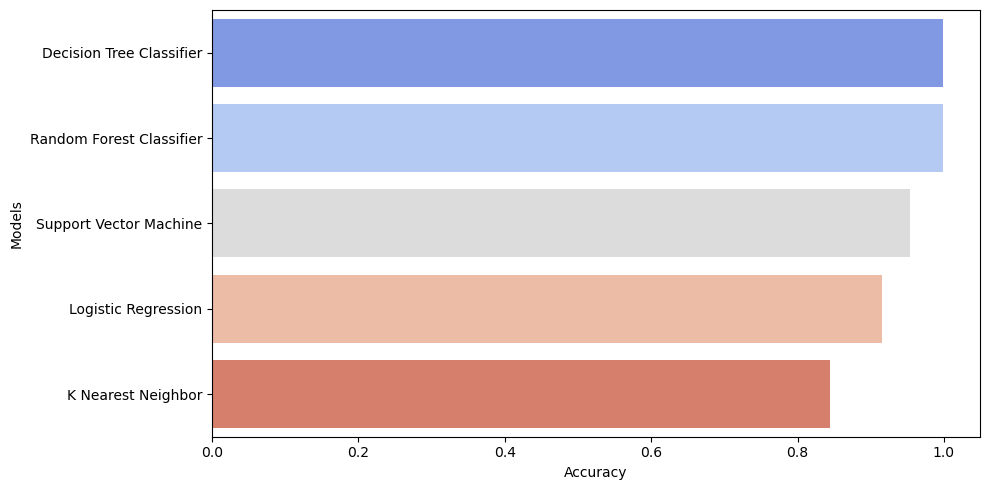

In [34]:
'''
Creating a pandas DataFrame with two columns which the Models will have its respective accuracy on the dataset
Using the Dataframe to plot a bar chart of the accuracies agains their respective models
'''
acc = pd.DataFrame({'Models': list(Accuracy.keys()), 'Accuracy': list(Accuracy.values())}).sort_values(by='Accuracy',ascending=False)
fig = plt.figure(figsize=(10,5))
sns.barplot(x= acc['Accuracy'], y=acc['Models'], palette='coolwarm')
plt.tight_layout()
acc

### Optimizing the Models with Better Hyperparameters

In [35]:
# Linear Regression
log_reg_opt = LogisticRegression()

# Decision Tree Classifier
decision_tree_opt = DecisionTreeClassifier(random_state=42)


# K Nearest Neighbor
knn_opt = KNeighborsClassifier(n_neighbors = 2)

# Support Vector Machine
svc_opt = SVC()

# Random Forest Classifier
rfc_opt = RandomForestClassifier(random_state=42)


##### Finding the best hyperparameters for each model

In [36]:
#Decision Tree
param_grid = {'min_samples_split': range(2,10), 'min_samples_leaf':range(1,10)}
grid_search = GridSearchCV(estimator=decision_tree_opt, param_grid=param_grid, scoring='accuracy',verbose=1, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params_dec = grid_search.best_params_
best_params_dec

Fitting 5 folds for each of 72 candidates, totalling 360 fits


{'min_samples_leaf': 2, 'min_samples_split': 2}

In [37]:
# Decision Tree Classifier
decision_tree_opt = DecisionTreeClassifier(min_samples_leaf=1,min_samples_split=2)
decision_tree_opt.fit(X_train, y_train)
decision_tree_opt_predictions = decision_tree_opt.predict(X_test)

In [38]:
# KNearest Neighbor
param_grid = {'leaf_size': range(1,100,10), 'p':range(1,10)}
grid_search = GridSearchCV(estimator=knn_opt, param_grid=param_grid, scoring='accuracy',verbose=1, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params_knn = grid_search.best_params_
best_params_knn

Fitting 5 folds for each of 90 candidates, totalling 450 fits


{'leaf_size': 1, 'p': 3}

In [39]:
knn_opt = KNeighborsClassifier(n_neighbors = 2, leaf_size=1, p=3)
knn_opt.fit(X_train, y_train)
knn_opt_predictions = knn_opt.predict(X_test)


In [40]:
# Logistic Regressor
param_grid = {'C': range(1,10), 'tol':[0.0001,0.001,0.01,0.1,1,10]}
grid_search = GridSearchCV(estimator=log_reg_opt, param_grid=param_grid, scoring='accuracy',verbose=1, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params_log = grid_search.best_params_
best_params_log

Fitting 5 folds for each of 54 candidates, totalling 270 fits


{'C': 1, 'tol': 10}

In [41]:
log_reg_opt = LogisticRegression(C=2,tol=1)
log_reg_opt.fit(X_train, y_train)
log_reg_opt_predictions = log_reg_opt.predict(X_test)


In [42]:

param_grid = {'n_estimators': range(100,1000,100)}
grid_search = GridSearchCV(estimator=rfc_opt, param_grid=param_grid, scoring='accuracy',verbose=1, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params_rfc = grid_search.best_params_
best_params_rfc

Fitting 5 folds for each of 9 candidates, totalling 45 fits


{'n_estimators': 300}

In [43]:
rfc_opt = RandomForestClassifier(n_estimators=400)
rfc_opt.fit(X_train, y_train)
rfc_opt_predictions = rfc_opt.predict(X_test)


In [44]:
# Support Vector Machine
param_grid = {'C': range(1,10), 'gamma': [1,0.1,0.01,0.001,0.0001]}
grid_search = GridSearchCV(estimator=svc_opt, param_grid=param_grid, scoring='accuracy',verbose=1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params_svc = grid_search.best_params_
best_params_svc

Fitting 5 folds for each of 45 candidates, totalling 225 fits


{'C': 6, 'gamma': 0.1}

In [45]:
svc_opt = SVC(C=7, gamma=0.1)
svc_opt.fit(X_train, y_train)
svc_opt_predictions=svc_opt.predict(X_test)


In [46]:
model = Sequential()
model.add(Dense(13,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(39,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(19,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [47]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='loss', mode='max', verbose=1)

In [48]:
model.fit(x=X_train,y=y_train, epochs=100,validation_data=(X_test,y_test),batch_size=256)

Epoch 1/100

12/12 [==============================] - 7s 111ms/step - loss: 0.6975 - val_loss: 0.6707
Epoch 2/100
12/12 [==============================] - 0s 40ms/step - loss: 0.6741 - val_loss: 0.6556
Epoch 3/100
12/12 [==============================] - 0s 26ms/step - loss: 0.6572 - val_loss: 0.6382
Epoch 4/100
12/12 [==============================] - 0s 25ms/step - loss: 0.6373 - val_loss: 0.6139
Epoch 5/100
12/12 [==============================] - 0s 19ms/step - loss: 0.6218 - val_loss: 0.5797
Epoch 6/100
12/12 [==============================] - 0s 12ms/step - loss: 0.5921 - val_loss: 0.5335
Epoch 7/100
12/12 [==============================] - 0s 12ms/step - loss: 0.5685 - val_loss: 0.4781
Epoch 8/100
12/12 [==============================] - 0s 11ms/step - loss: 0.5401 - val_loss: 0.4278
Epoch 9/100
12/12 [==============================] - 0s 10ms/step - loss: 0.5059 - val_loss: 0.3809
Epoch 10/100
12/12 [==============================] - 0s 11ms/step - loss: 0.4762 - val_loss: 0.33

Epoch 80/100
12/12 [==============================] - 0s 16ms/step - loss: 0.1580 - val_loss: 0.0860
Epoch 81/100
12/12 [==============================] - 0s 15ms/step - loss: 0.1546 - val_loss: 0.0856
Epoch 82/100
12/12 [==============================] - 0s 9ms/step - loss: 0.1636 - val_loss: 0.0884
Epoch 83/100
12/12 [==============================] - 0s 10ms/step - loss: 0.1622 - val_loss: 0.0854
Epoch 84/100
12/12 [==============================] - 0s 9ms/step - loss: 0.1544 - val_loss: 0.0876
Epoch 85/100
12/12 [==============================] - 0s 9ms/step - loss: 0.1630 - val_loss: 0.0921
Epoch 86/100
12/12 [==============================] - 0s 10ms/step - loss: 0.1577 - val_loss: 0.0864
Epoch 87/100
12/12 [==============================] - 0s 25ms/step - loss: 0.1566 - val_loss: 0.0857
Epoch 88/100
12/12 [==============================] - 0s 9ms/step - loss: 0.1532 - val_loss: 0.0815
Epoch 89/100
12/12 [==============================] - 0s 8ms/step - loss: 0.1489 - val_loss: 0.

In [49]:
nn_pred = model.predict(X_test)
nn_pred=np.rint(nn_pred)
nn_pred = nn_pred.flatten()

41/41 [==============================] - 3s 7ms/step


In [50]:
predictions_opt = [log_reg_opt_predictions, decision_tree_opt_predictions, 
                   rfc_opt_predictions,knn_opt_predictions, svc_opt_predictions, nn_pred]

In [51]:
'''
Importing metrics from sklearn to evaluate the predictions
- Created a for loop to iterate throught the predictions of each model and 
then calculating its accuracy and classification report
'''
from sklearn.metrics import classification_report, confusion_matrix
Accuracy_opt = {'Logistic Regression Optimized': 0, 'Decision Tree Classifier Optimized': 0,
            'Random Forest Classifier Optimized': 0,
          'K Nearest Neighbor Optimized': 0, 'Support Vector Machine Optimized': 0, 'Artificial Neural Network': 0}
models_opt = ['Logistic Regression Optimized', 'Decision Tree Classifier Optimized','Random Forest Classifier Optimized',
          'K Nearest Neighbor Optimized', 'Support Vector Machine Optimized', 'Artificial Neural Network']
for acc, model, prediction in zip(list(Accuracy_opt.keys()), models_opt, predictions_opt):
    Accuracy_opt[acc] = np.mean(y_test == prediction)
    print(f'{model} - Accuracy: {Accuracy_opt[acc]} \n')
    print(classification_report(y_test, prediction),confusion_matrix(y_test, prediction), sep='\n')
    print('\n'*3)

Logistic Regression Optimized - Accuracy: 0.9164715066354411 

              precision    recall  f1-score   support

           0       0.88      0.91      0.89       493
           1       0.94      0.92      0.93       788

    accuracy                           0.92      1281
   macro avg       0.91      0.92      0.91      1281
weighted avg       0.92      0.92      0.92      1281

[[448  45]
 [ 62 726]]




Decision Tree Classifier Optimized - Accuracy: 0.9992193598750976 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       493
           1       1.00      1.00      1.00       788

    accuracy                           1.00      1281
   macro avg       1.00      1.00      1.00      1281
weighted avg       1.00      1.00      1.00      1281

[[492   1]
 [  0 788]]




Random Forest Classifier Optimized - Accuracy: 0.9992193598750976 

              precision    recall  f1-score   support

           0       1.00      1.00     

Models  Base Accuracy  Optimized Accuracy
1  Decision Tree Classifier       0.999219            0.999219
2  Random Forest Classifier       0.998439            0.999219
4    Support Vector Machine       0.953162            0.951600
0       Logistic Regression       0.915691            0.916472
3        K Nearest Neighbor       0.844653            0.840749

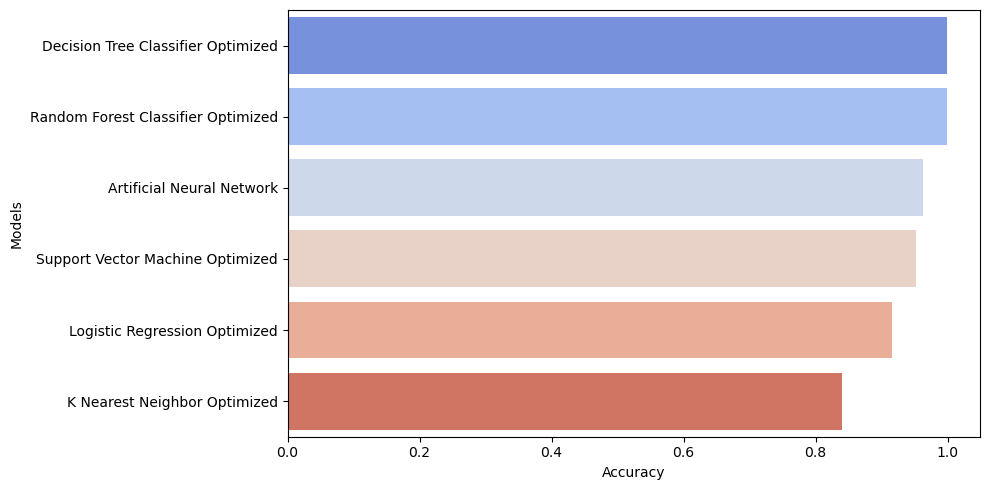

In [73]:
'''
Creating a pandas DataFrame with two columns which the Models will have its respective accuracy on the dataset
Using the Dataframe to plot a bar chart of the accuracies agains their respective models
'''
acc_opt = pd.DataFrame({'Models':list(Accuracy_opt.keys()),
                    'Accuracy': list(Accuracy_opt.values())}).sort_values(by='Accuracy',ascending=False)

fig = plt.figure(figsize=(10,5))
sns.barplot(x= acc_opt['Accuracy'], y=acc_opt['Models'], palette='coolwarm')
plt.tight_layout()
acc

Models       Type  Accuracy
0       Logistic Regression       Base  0.915691
1  Decision Tree Classifier       Base  0.999219
2  Random Forest Classifier       Base  0.998439
3        K Nearest Neighbor       Base  0.844653
4    Support Vector Machine       Base  0.953162
5       Logistic Regression  Optimized  0.916472
6  Decision Tree Classifier  Optimized  0.999219
7  Random Forest Classifier  Optimized  0.999219
8        K Nearest Neighbor  Optimized  0.840749
9    Support Vector Machine  Optimized  0.951600

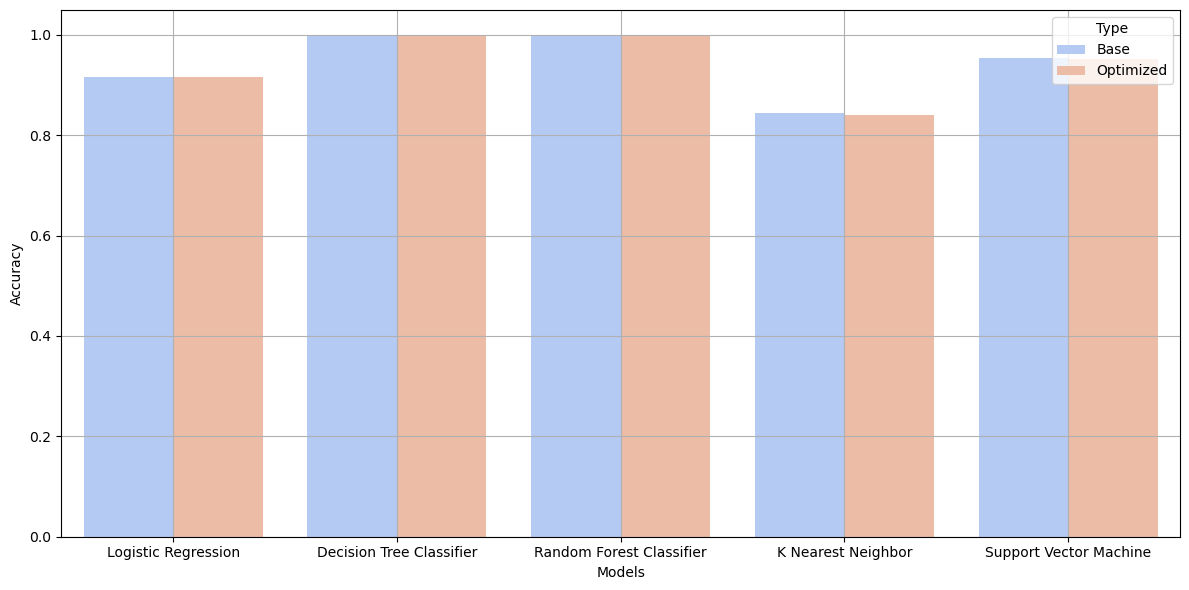

In [69]:

# Create a combined DataFrame
model_acc = {
    'Models': list(Accuracy.keys()) + list(Accuracy_opt.keys()),
    'Accuracy': list(Accuracy.values()) + list(Accuracy_opt.values()),
    'Type': ['Base'] * len(Accuracy) + ['Optimized'] * len(Accuracy_opt)
}

model_df = pd.DataFrame(model_acc)

# Extract base and optimized models for the same set of models
# Assuming the models in Accuracy and Accuracy_opt are correlated as base and optimized versions
model_df_combined = pd.DataFrame({
    'Models': list(Accuracy.keys()),
    'Base': list(Accuracy.values()),
    'Optimized': list(Accuracy_opt.values())[:5]
})

# Melt the DataFrame to a long format for seaborn
model_df_melted = model_df_combined.melt(id_vars='Models', value_vars=['Base', 'Optimized'], 
                             var_name='Type', value_name='Accuracy')

# Plotting
fig = plt.figure(figsize=(12, 6))
sns.barplot(x='Models', y='Accuracy', hue='Type', data=model_df_melted, palette='coolwarm')
plt.tight_layout()


# Display the DataFrame
model_df_melted

- From the Plot above we observe that the optimized models had a slight increase in their accuracy, but not a significant one

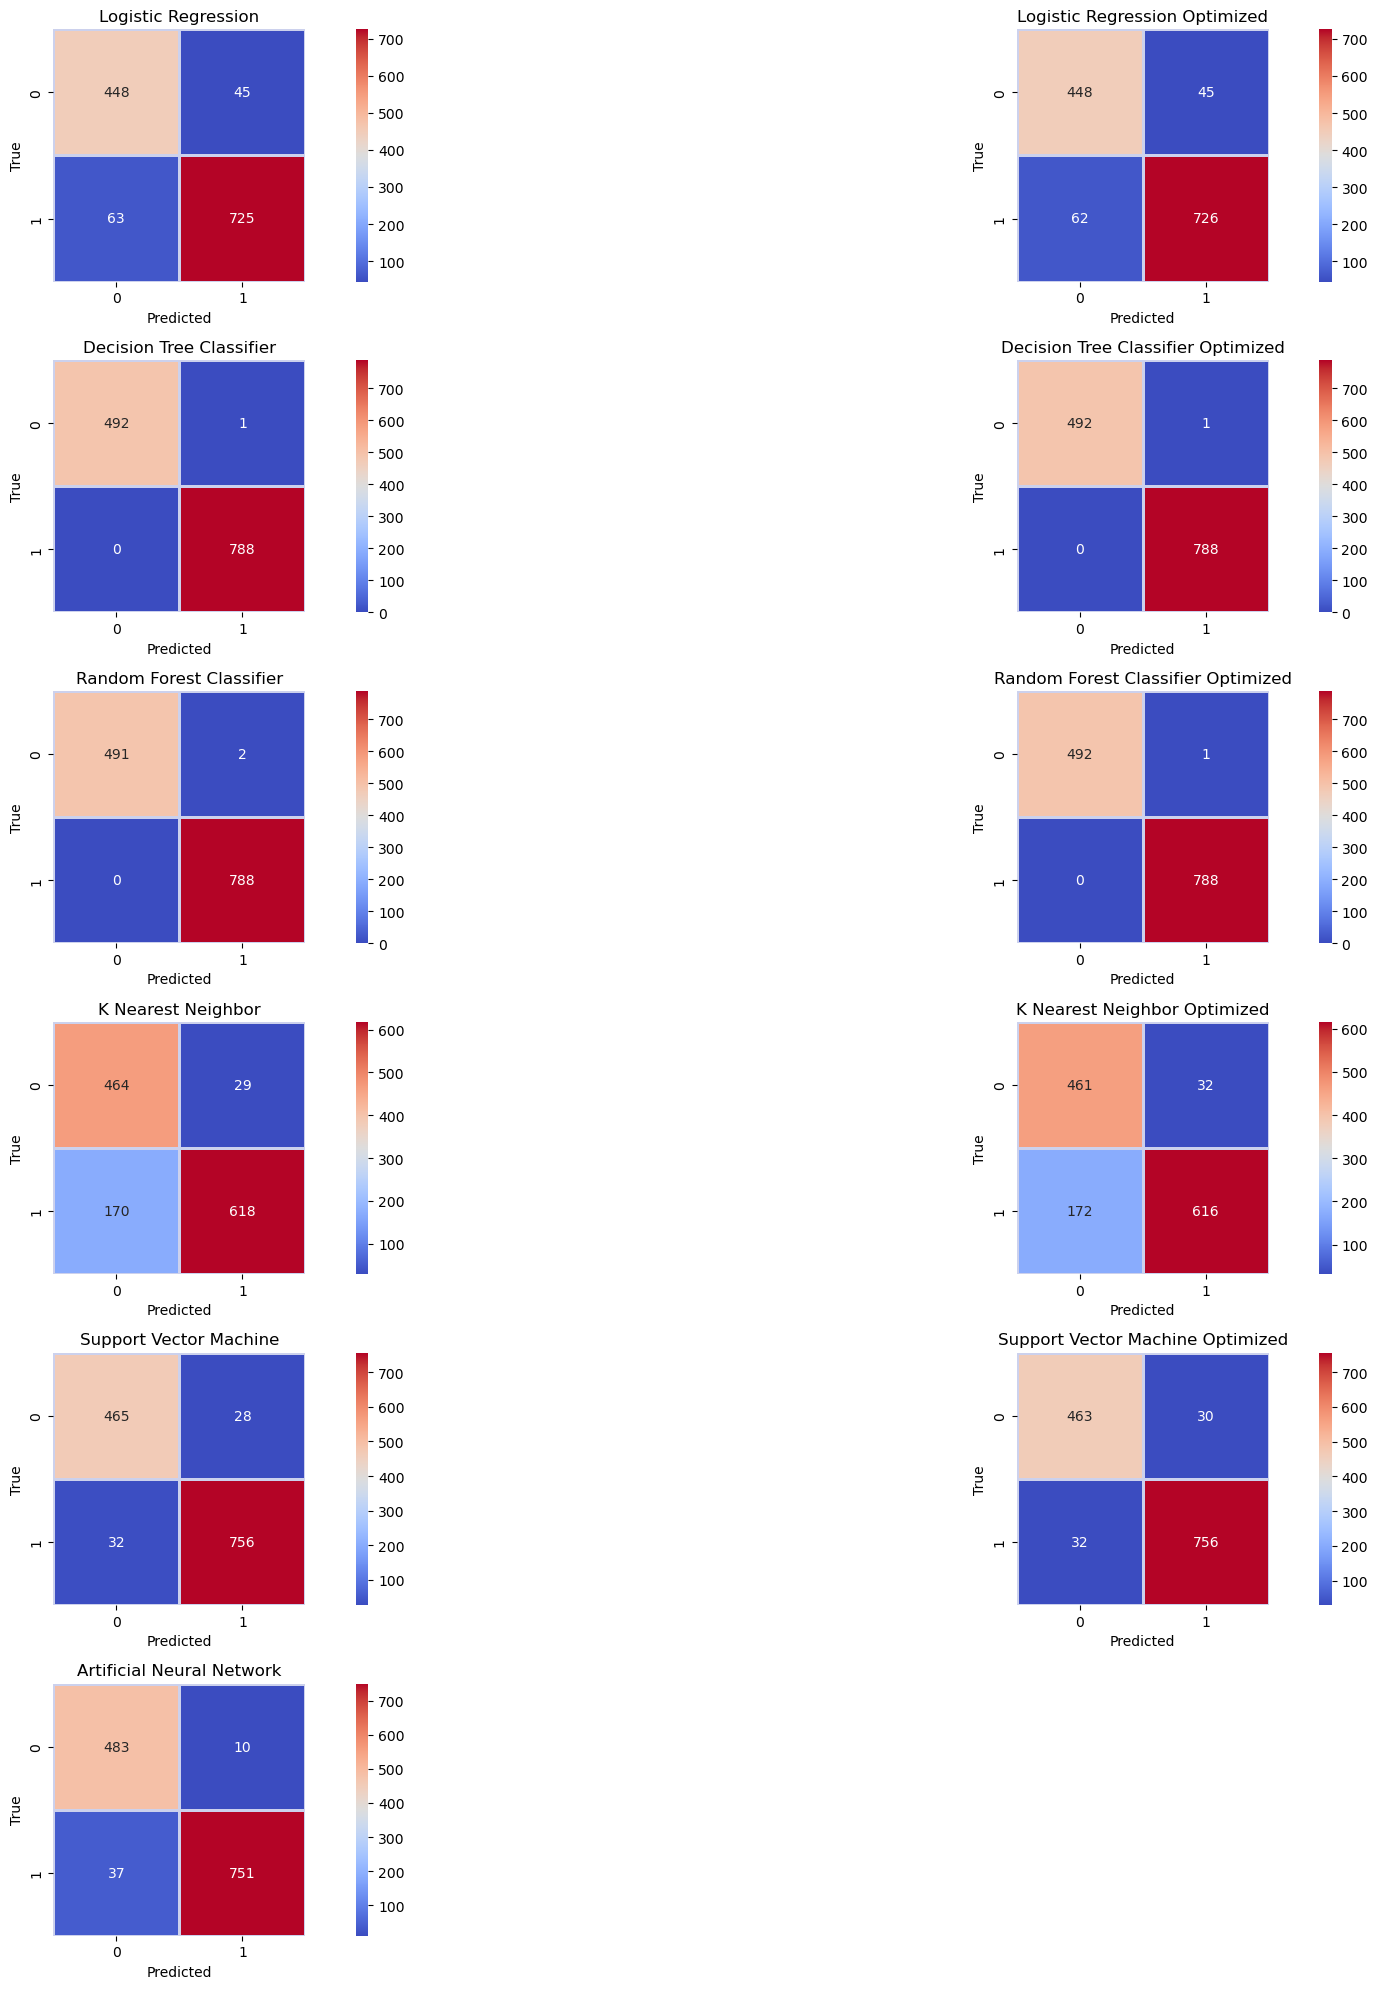

In [98]:
# Visualization via confusion matrix Heatmap between the model base accuracy and te accuracy of the optimized model
all_predictions =  [log_reg_pred,log_reg_opt_predictions, decision_tree_pred,decision_tree_opt_predictions,
                rfc_pred,rfc_opt_predictions,knn_pred,knn_opt_predictions,svc_pred,svc_opt_predictions,nn_pred]
all_model_names = list(Accuracy.keys())+ list(Accuracy_opt.keys())
order_indices = [0,2,4,6,8,1,3,5,7,9,10]

all_model_names = [x for _, x in sorted(zip(order_indices, all_model_names))]
#Displaying the confusion matrix of all the models as a heatmap
fig = plt.figure(figsize=(20,20))
for prediction, e, model in zip(all_predictions,range(1,12), all_model_names):
    plt.subplot(6,2,e)
    sns.heatmap(confusion_matrix(y_test, prediction), annot= True, cmap='coolwarm',
                fmt='.0f', square=True, linewidths=2, linecolor="#CCD1ED")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(model)
plt.tight_layout()
    


# From the models trained with the dataset in the project, the model with the best performance is a tie between 
- # Decision Tree Classifier 
- # Random Forest Classifier 

### This because these models are best used in dataset where human decision needed to classify a dataset  